In [1]:
import os
from random import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import cv2

from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from random import uniform
from scipy.stats import randint
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import io
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dropout




In [2]:
#ball_release = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\tossstartframes.csv",header=None)
data_path = r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\CSVs\\"
#test_data = pd.read_excel(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\model_inout\test_25-06.xlsx")
frames = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\frames.csv")
#cont_frames = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\contactframes.csv")
#ball_toss = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\tossstartframes.csv")

In [3]:
def classify_data(range_value,file,data_path):
    data_list = []
    class_list = []
    ball_toss = []
    
    
    #print("---------",frames)
    for i in range(len(file)):
            #print(i)
            file_name = file.iloc[i][0]
            #print("----",file_name)
            toss_row = file.iloc[i][1]
            hit_row = file.iloc[i][2]
            
            
            for csv in os.listdir(data_path): 
                
                if file_name in csv:
                        #print("\n",file_name)
                        data = pd.read_csv(data_path+"\\"+csv)
                        #print(data)
                        
                        
                        
                        class_list = ["Before" for i in range(0,hit_row-range_value)]
                        class_list.extend(["Hit" for i in range(hit_row-range_value,hit_row+range_value)])
                        class_list.extend(["After" for i in range(hit_row+range_value,len(data))])

                        ball_toss = ["Before Toss" for i in range(0,toss_row-range_value)]
                        ball_toss.extend(["Toss" for i in range(toss_row-range_value,toss_row+range_value)])
                        ball_toss.extend(["After Toss" for i in range(toss_row+range_value,len(data))])
                        
                        
                        file_list = [file_name for i in range(len(data))]
                        data = data.assign(File=file_list,Class_1=class_list,Class_2=ball_toss)
                        data_list.append(data)   
                        dataframe = pd.concat(data_list)
                        #print(dataframe)
                        
                        
    return dataframe

In [4]:
def lstm_data(data,contact_file,fl_name):
    
    lstm_data = pd.DataFrame()
    #print("---------",frames)
    for i in range(len(contact_file)):
            #print(i)
        file_name = contact_file.iloc[i][0]
        for file in fl_name:
            
            if file_name == file:
            
                #print("----",file_name)
                toss_row = contact_file.iloc[i][1]
                hit_row = contact_file.iloc[i][2]
                #df = data[data['File'].contains(name)]
                df = data[data['File'].str.contains(file_name)]
                start =  toss_row-6
                end = hit_row+6
                #print(name,"-------",start,"-----------",end)    

                    #print(data)
                frames = [lstm_data, data[start:end]]

                lstm_data = pd.concat(frames)

    return lstm_data

In [41]:
frames

,File Name,Ball Release,Hit Row
0,Lak2,712,789
1,Lak3,608,692
2,Lak4,715,797
3,Lak5,762,836
4,cam 3 slow,405,637
5,cam 4 slow,566,789
6,cam 5 slow,381,613
7,cam 6 slow,382,615
8,cam 7 slow,348,579
9,cam 8 slow,541,765


In [50]:
for i in range(len(frames)):
    print(frames.iloc[i][0],frames.iloc[i][1],frames.iloc[i][2])
    for name in np.unique(model_data['File']):    
        if frames.iloc[i][0] == name:
            print(model_data[frames.iloc[i][1]-6:frames.iloc[i][2]+6]['File'])

Lak2 712 789
706    Lak2
707    Lak2
708    Lak2
709    Lak2
710    Lak2
       ... 
790    Lak2
791    Lak2
792    Lak2
793    Lak2
794    Lak2
Name: File, Length: 89, dtype: object
Lak3 608 692
602    Lak2
603    Lak2
604    Lak2
605    Lak2
606    Lak2
       ... 
693    Lak2
694    Lak2
695    Lak2
696    Lak2
697    Lak2
Name: File, Length: 96, dtype: object
Lak4 715 797
709    Lak2
710    Lak2
711    Lak2
712    Lak2
713    Lak2
       ... 
798    Lak2
799    Lak2
800    Lak2
801    Lak2
802    Lak2
Name: File, Length: 94, dtype: object
Lak5 762 836
756    Lak2
757    Lak2
758    Lak2
759    Lak2
760    Lak2
       ... 
837    Lak2
838    Lak2
839    Lak2
840    Lak2
841    Lak2
Name: File, Length: 86, dtype: object
cam 3 slow 405 637
399    Lak2
400    Lak2
401    Lak2
402    Lak2
403    Lak2
       ... 
638    Lak2
639    Lak2
640    Lak2
641    Lak2
642    Lak2
Name: File, Length: 244, dtype: object
cam 4 slow 566 789
560    Lak2
561    Lak2
562    Lak2
563    Lak2
564    Lak2

323    Lak2
324    Lak2
325    Lak2
326    Lak2
327    Lak2
       ... 
581    Lak2
582    Lak2
583    Lak2
584    Lak2
585    Lak2
Name: File, Length: 263, dtype: object
kev 5 slow 416 679
410    Lak2
411    Lak2
412    Lak2
413    Lak2
414    Lak2
       ... 
680    Lak2
681    Lak2
682    Lak2
683    Lak2
684    Lak2
Name: File, Length: 275, dtype: object
kev 6 slow 373 612
367    Lak2
368    Lak2
369    Lak2
370    Lak2
371    Lak2
       ... 
613    Lak2
614    Lak2
615    Lak2
616    Lak2
617    Lak2
Name: File, Length: 251, dtype: object


In [32]:
file_list = np.unique(model_data['File'])
d = lstm_data(model_data,frames,file_list)

In [34]:
d["Class_1"]

706    Before
707    Before
708    Before
709    Before
710    Before
        ...  
613    Before
614    Before
615    Before
616    Before
617    Before
Name: Class_1, Length: 11736, dtype: object

In [35]:
d.to_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\LSTM_In.csv")

In [31]:
list(num).index("Toss")

700

In [5]:
def cal_ang(i,j,k,l):
    
    
    angle_rad = []
    sho_rand_angle = []
    
    for x1,y1,x2,y2 in zip(i,j,k,l):
        
        
    
        angle_rad.append(math.atan2( y2 - y1 , x2 - x1 ))
        #angle_deg = math.degrees(angle_rad)
        #nose_wrist_angle.append(pygame.math.Vector2(x1, y1).angle_to((x2, y2)))
    
        
    return angle_rad


In [6]:
feature_columns = ['NOSE_X', 'NOSE_Y', 'NOSE_Z', 'LEFT_SHOULDER_X', 'LEFT_SHOULDER_Y',
       'LEFT_SHOULDER_Z', 'RIGHT_SHOULDER_X', 'RIGHT_SHOULDER_Y',
       'RIGHT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y', 'LEFT_ELBOW_Z',
       'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'RIGHT_ELBOW_Z', 'LEFT_WRIST_X',
       'LEFT_WRIST_Y', 'LEFT_WRIST_Z', 'RIGHT_WRIST_X', 'RIGHT_WRIST_Y',
       'RIGHT_WRIST_Z', 'LEFT_HIP_X', 'LEFT_HIP_Y', 'LEFT_HIP_Z',
       'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'RIGHT_HIP_Z', 'LEFT_KNEE_X',
       'LEFT_KNEE_Y', 'LEFT_KNEE_Z', 'RIGHT_KNEE_X', 'RIGHT_KNEE_Y',
       'RIGHT_KNEE_Z', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y', 'LEFT_ANKLE_Z',
       'RIGHT_ANKLE_X', 'RIGHT_ANKLE_Y', 'RIGHT_ANKLE_Z', 'LEFT_HEEL_X',
       'LEFT_HEEL_Y', 'LEFT_HEEL_Z', 'RIGHT_HEEL_X', 'RIGHT_HEEL_Y',
       'RIGHT_HEEL_Z', 'LEFT_FOOT_INDEX_X', 'LEFT_FOOT_INDEX_Y',
       'LEFT_FOOT_INDEX_Z', 'RIGHT_FOOT_INDEX_X', 'RIGHT_FOOT_INDEX_Y',
       'RIGHT_FOOT_INDEX_Z' ,'Left_Sho_Wrist_Angle','Nose_Left_Wrist','Nose_Left_Elbow','Nose_Right_Wrist_Angle','Right_Sho_Wrist Angle','Nose_Right_Elbow']

In [8]:
model_data = classify_data(12,frames,data_path)

nose_ryt_wrist = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['RIGHT_WRIST_X'],model_data['RIGHT_WRIST_Y'])
sho_ryt_wrist = cal_ang(model_data['RIGHT_SHOULDER_X'],model_data['RIGHT_SHOULDER_Y'],model_data['RIGHT_WRIST_X'],model_data['RIGHT_WRIST_Y'])
nose_ryt_elb = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['RIGHT_ELBOW_X'],model_data['RIGHT_ELBOW_Y'])

sho_left_wrist = cal_ang(model_data['LEFT_SHOULDER_X'],model_data['LEFT_SHOULDER_Y'],model_data['LEFT_WRIST_X'],model_data['LEFT_WRIST_Y'])
nose_left_wrist = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['LEFT_WRIST_X'],model_data['LEFT_WRIST_Y'])
nose_left_elb = cal_ang(model_data['NOSE_X'],model_data['NOSE_Y'],model_data['LEFT_ELBOW_X'],model_data['LEFT_ELBOW_Y'])


model_data['Nose_Right_Wrist_Angle'] = nose_ryt_wrist 
model_data['Right_Sho_Wrist Angle'] = sho_ryt_wrist
model_data['Nose_Right_Elbow'] = nose_ryt_elb
model_data['Left_Sho_Wrist_Angle'] = sho_left_wrist
model_data['Nose_Left_Wrist'] = nose_left_wrist
model_data['Nose_Left_Elbow'] = nose_left_elb

file_names = np.unique(model_data['File'])


#lstm = lstm_data(model_data,file_names)


In [14]:
len(lstm)

2155563

In [13]:
lstm.to_excel(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\codeGLSTM.xlsx")

ValueError: This sheet is too large! Your sheet size is: 2155563, 66 Max sheet size is: 1048576, 16384

In [29]:
model_data = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\DataSet_16_08.csv")

In [6]:
def find_index(dataframe):
    
    hit_arr = model_data["Class_2"]
    np_hit_array = np.array(hit_arr)
    item_hit_index = np.where(np_hit_array=='Toss')
    ind_toss = item_hit_index[0][0]
    
    hit_arr = model_data["Class_1"]
    np_hit_array = np.array(hit_arr)
    item_hit_index = np.where(np_hit_array=='Hit')
    ind_hit = item_hit_index[0][-1]
        
    return ind_toss,ind_hit

In [33]:
last_hit_index

41540

In [ ]:
model_data.columns

In [8]:
input_data = model_data[760:40747]
test = model_data[1:760]
test_kev = model_data[40747:]

In [9]:
X = input_data[feature_columns]
Y = input_data['Class_1']

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.columns

*XG Boost Forest Hit Class*

In [10]:
label_encoder.classes_

array(['After', 'Before', 'Hit'], dtype=object)

In [17]:
# Create an array of potential alpha values to test
alphas = np.logspace(-2, 2, 100)  # Example range of alpha values

# Create LassoCV model with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the LassoCV model to the training data
lasso_cv.fit(X_train, y_train)

# Get the best alpha value from cross-validation
best_alpha = lasso_cv.alpha_

# Print the best alpha value
print("Best Alpha:", best_alpha)

# Now you can create a final Lasso model with the best alpha and fit it to the entire training data
final_lasso = Lasso(alpha=best_alpha)
final_lasso.fit(X_train, y_train)

# Evaluate the final model on the test data
y_pred = final_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6009365992977109, tolerance: 0.5220408315469802
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5603830209661282, tolerance: 0.5220408315469802
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5777735022879824, tolerance: 0.5220408315469802
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.1834596439513, tolerance: 0.5220408315469802
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6358355851698434, tolerance: 0.5189176848874613
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6165482758528924, tolerance: 0.5189176848874613
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: C

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5798704182043366, tolerance: 0.5156774517684891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5343842947290796, tolerance: 0.5156774517684891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5315378255386349, tolerance: 0.5156774517684891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470.41553616722194, tolerance: 0.5156774517684891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483.1888072644839, tolerance: 0.5156774517684891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.07467333661566, tolerance: 0.5156774517684891
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: C

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5291649160199086, tolerance: 0.5202728117184711
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5892655366674262, tolerance: 0.5202728117184711
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6004429173208337, tolerance: 0.5202728117184711
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438.83303659768376, tolerance: 0.5202728117184711
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460.8218037459361, tolerance: 0.5202728117184711
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 505.04862402095273, tolerance: 0.5202728117184711
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: C

Best Alpha: 0.01
Mean Squared Error: 0.08423962851738569


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040.617050191088, tolerance: 0.6492471061093288
  model = cd_fast.enet_coordinate_descent(


In [19]:
lasso = Lasso(alpha=0.01)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

coefficients = pd.DataFrame({'Features': X.columns, 'Coefficients': lasso.coef_})

coef_lis =[]

for j in range(len(coefficients)):
    if coefficients.iloc[j][1]!= 0:
        coef_lis.append((coefficients.iloc[j][0]))
        
        
        
#coef_lis.append('Nose_Right_Wrist_Angle')
#coef_lis.append('Right_Sho_Wrist Angle') 
#coef_lis.append('Nose_Right_Elbow')
         
        
#coef_lis.append('Left_Sho_Wrist_Angle')
#coef_lis.append('Nose_Left_Wrist') 
#coef_lis.append('Nose_Left_Elbow')
    
print(([i for i in coefficients['Coefficients'] if i!=0]))

#0.08251833560364905

Mean Squared Error: 0.08423962851738569
[0.0003849084996475453, 0.000336888627743254, 0.0006700250730395931, 0.0018070042490333526, -0.0024926401746549957, -0.0019803287094960847, -0.0024585444128189292, 0.001943319776850633, -0.0002816420413925136, 0.002356756301163863, -0.0013847770455951442, 0.0013498650328003386, 0.0010756055121925452, 0.00046833504907129646, 0.00023911223562180024, -7.899474966520914e-06, 0.0018757604167394877, -0.0004062650249494613, -0.0008487796978344095, 0.002897092075577592, 4.167389878447406e-05, -0.002885201131327216, -0.003287182994713356, 1.3635444510584786e-05, -0.001165268469182152, 0.0005843280728041204, -0.000914713814679259, -0.0007695926624113642, -0.0002891579511082943, -0.0009151665678455365, -1.750297603431972e-05, -0.0007796303995536893, 0.0005412077234665879, 4.6121821849603814e-05, 0.00034560366995243743, 0.000719878480601246, 7.703000493635558e-05, 0.0007766053520556868, 0.0007328037849469504, -0.0009240165701518709, 1.423839158958018e-06, 0.

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040.617050191088, tolerance: 0.6492471061093288
  model = cd_fast.enet_coordinate_descent(


In [ ]:
len(dataframe.columns[:-2])

In [21]:
coef_lis

['NOSE_X',
 'NOSE_Y',
 'NOSE_Z',
 'LEFT_SHOULDER_X',
 'LEFT_SHOULDER_Y',
 'LEFT_SHOULDER_Z',
 'RIGHT_SHOULDER_X',
 'RIGHT_SHOULDER_Y',
 'RIGHT_SHOULDER_Z',
 'LEFT_ELBOW_X',
 'LEFT_ELBOW_Y',
 'LEFT_ELBOW_Z',
 'RIGHT_ELBOW_X',
 'RIGHT_ELBOW_Y',
 'RIGHT_ELBOW_Z',
 'LEFT_WRIST_X',
 'LEFT_WRIST_Y',
 'LEFT_WRIST_Z',
 'RIGHT_WRIST_X',
 'RIGHT_WRIST_Y',
 'RIGHT_WRIST_Z',
 'LEFT_HIP_X',
 'LEFT_HIP_Y',
 'LEFT_HIP_Z',
 'RIGHT_HIP_X',
 'RIGHT_HIP_Y',
 'RIGHT_HIP_Z',
 'LEFT_KNEE_X',
 'LEFT_KNEE_Y',
 'RIGHT_KNEE_X',
 'RIGHT_KNEE_Y',
 'RIGHT_KNEE_Z',
 'LEFT_ANKLE_X',
 'LEFT_ANKLE_Y',
 'LEFT_ANKLE_Z',
 'RIGHT_ANKLE_X',
 'RIGHT_ANKLE_Y',
 'RIGHT_ANKLE_Z',
 'LEFT_HEEL_X',
 'LEFT_HEEL_Y',
 'LEFT_HEEL_Z',
 'RIGHT_HEEL_X',
 'RIGHT_HEEL_Y',
 'RIGHT_HEEL_Z',
 'LEFT_FOOT_INDEX_X',
 'LEFT_FOOT_INDEX_Y',
 'LEFT_FOOT_INDEX_Z',
 'RIGHT_FOOT_INDEX_X',
 'RIGHT_FOOT_INDEX_Y',
 'RIGHT_FOOT_INDEX_Z',
 'Left_Sho_Wrist_Angle',
 'Nose_Left_Elbow',
 'Nose_Right_Wrist_Angle',
 'Right_Sho_Wrist Angle']

In [22]:
new_X = input_data[coef_lis]
new_X_train, new_X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3)

In [ ]:
param_grid = {'max_depth': [6, 10, 15, 20],'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],'gamma': [0, 0.25, 0.5, 1.0],'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],'n_estimators': [100]}

In [ ]:
acc = []
cm = []
for i in range(1,20):
    new_X = input_data[coef_lis]
    new_X_train, new_X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state= None,shuffle=True)

    # fit model no training data
    xg_model = XGBClassifier()
    xg_model.fit(new_X_train, y_train) 

    y_pred = xg_model.predict(new_X_test)


    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print("Accuracy:", accuracy)
    
    cm.append(confusion_matrix(y_test,y_pred))

In [25]:
new_X_train

,NOSE_X,NOSE_Y,NOSE_Z,LEFT_SHOULDER_X,LEFT_SHOULDER_Y,LEFT_SHOULDER_Z,RIGHT_SHOULDER_X,RIGHT_SHOULDER_Y,RIGHT_SHOULDER_Z,LEFT_ELBOW_X,...,LEFT_FOOT_INDEX_Z,RIGHT_FOOT_INDEX_X,RIGHT_FOOT_INDEX_Y,RIGHT_FOOT_INDEX_Z,Left_Sho_Wrist_Angle,Nose_Left_Wrist,Nose_Left_Elbow,Nose_Right_Wrist_Angle,Right_Sho_Wrist Angle,Nose_Right_Elbow
4412,0.670456,0.437917,-0.584805,0.696898,0.505910,-0.012920,0.559952,0.495668,-0.420204,0.717843,...,0.179560,0.623463,0.951869,0.179560,1.196412,1.197454,1.273103,2.103263,1.770258,2.302446
31236,308.733802,812.318573,-256.473899,323.943858,772.491608,-86.185829,257.821183,770.521393,-189.564629,332.751846,...,-142.666762,258.885312,536.793938,261.856041,-1.311423,-1.280151,-1.310933,-1.703426,-1.278904,-1.940640
2460,0.403041,0.413498,-0.257814,0.358754,0.461238,0.124425,0.279150,0.450656,-0.476142,0.391551,...,-0.106227,0.378424,0.897431,-0.106227,0.387277,0.766863,1.667772,2.145402,1.692063,2.405570
16059,478.398006,858.255539,163.520261,438.094018,816.390228,323.904355,453.140738,856.176224,34.446428,426.840606,...,-9.937214,393.005376,535.174751,-375.023847,-1.147303,-1.596261,-2.027090,1.175662,1.006038,1.227493
11157,376.518245,826.450729,-238.654396,361.529632,802.499847,-46.389776,306.169910,810.404816,-266.287758,352.891030,...,100.912363,230.566249,520.678825,183.522577,-1.463075,-1.591489,-1.859778,-1.958784,-1.475687,-2.285803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13620,268.153396,836.961441,-232.136436,294.043965,803.649292,-122.756510,228.321218,778.467178,-24.736201,316.569371,...,75.466949,168.209653,519.181747,279.937284,1.171975,0.744140,0.190291,-2.258183,-2.313931,-2.209002
16120,532.359996,790.498276,270.374200,475.917242,778.494492,295.871773,524.655147,778.648682,74.197937,458.505178,...,-38.929292,313.792191,594.440918,-213.877180,-1.550782,-2.115573,-2.460183,-1.962574,-1.932929,-1.831293
36652,0.500908,0.466426,-0.131356,0.480081,0.509470,0.188741,0.386274,0.502266,-0.272083,0.540268,...,-0.372149,0.468551,0.912814,-0.372149,0.148558,0.517239,1.171295,2.193328,1.743885,2.442351
32957,0.457651,0.465538,-0.304656,0.454686,0.501850,0.054796,0.325029,0.490468,-0.349341,0.530784,...,-0.504703,0.387278,0.873500,-0.504703,0.081901,0.313072,0.825443,2.435747,2.019422,2.647073


*XGB FOR HIT*

In [23]:
params = {
    'subsample': 0.7,
    'reg_lambda': 50.0,
    'n_estimators': 100,
    'min_child_weight': 5.0,
    'max_depth': 6,
    'learning_rate': 0.2,
    'gamma': 1.0,
    'colsample_bytree': 0.9,
    'colsample_bylevel': 0.4,
}

model = XGBClassifier(**params)



In [24]:
model.fit(new_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5.0, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [25]:
y_pred = model.predict(new_X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.9973326664999583

In [109]:
y_pred1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [26]:
confusion_matrix(y_test,y_pred)

array([[2894,    0,   11],
       [   0, 8717,    7],
       [   6,    8,  354]], dtype=int64)

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [36]:
sklearn.metrics.classification_report(y_test,y_pred,target_names=label_encoder.classes_)

'              precision    recall  f1-score   support\n\n       After       1.00      1.00      1.00      3004\n      Before       1.00      1.00      1.00      8626\n         Hit       0.96      0.97      0.97       367\n\n    accuracy                           1.00     11997\n   macro avg       0.99      0.99      0.99     11997\nweighted avg       1.00      1.00      1.00     11997\n'

In [19]:
import sklearn

In [111]:
accuracy_score(y_test,y_pred1)

0.9978327915312162

In [115]:
y_pred2 = model.predict(test[coef_lis])

In [116]:
tes = label_encoder.fit_transform(test['Class_1'])

In [117]:
accuracy_score(tes,y_pred2)

0.9934123847167325

In [118]:
confusion_matrix(tes,y_pred2)

array([[107,   0,   4],
       [  0, 624,   0],
       [  0,   1,  23]], dtype=int64)

In [119]:
sklearn.metrics.classification_report(tes,y_pred2)

'              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98       111\n           1       1.00      1.00      1.00       624\n           2       0.85      0.96      0.90        24\n\n    accuracy                           0.99       759\n   macro avg       0.95      0.97      0.96       759\nweighted avg       0.99      0.99      0.99       759\n'

*RANDOM FOREST FOR HIT*

In [120]:
params ={'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 7, 'min_samples_split': 6}
model = RandomForestClassifier(**params)

In [121]:
model.fit(new_X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
y_pred = model.predict(test[coef_lis])

In [131]:
tes = label_encoder.fit_transform(test['Class_1'])

In [133]:
accuracy_score(tes,y_pred)

0.9920948616600791

In [134]:
confusion_matrix(tes,y_pred)

array([[108,   0,   3],
       [  0, 624,   0],
       [  0,   3,  21]], dtype=int64)

In [135]:
sklearn.metrics.classification_report(tes,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.99       111\n           1       1.00      1.00      1.00       624\n           2       0.88      0.88      0.88        24\n\n    accuracy                           0.99       759\n   macro avg       0.96      0.95      0.95       759\nweighted avg       0.99      0.99      0.99       759\n'

In [ ]:
params = {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 6}

model = RandomForestClassifier(**params)



In [ ]:
model.fit(new_X_train, y_train)

In [ ]:
y_pred=model.predict(test[coef_lis])

In [ ]:
tes = label_encoder.fit_transform(test['Class_2'])

In [ ]:
accuracy_score(tes,y_pred)

In [ ]:
import sklearn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
folds = 5
param_comb = 100

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
  
random_search = RandomizedSearchCV(xg_model, param_distributions=param_grid, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

random_search.fit(new_X_train, y_train)

In [ ]:
print(random_search.best_params_)

In [ ]:
test_data = test

In [ ]:
filename = r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\XGBoostmodel_06_08.sav'
pickle.dump(xg_model, open(filename, 'wb'))

In [ ]:
pickleFile = pickle.load(open(r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Hit model\XGBoostmodel_06_08.sav', "rb"))

In [ ]:
pd.DataFrame(pickleFile.predict(test_data[coef_lis])).to_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\Hit_Lak2_XGB.csv")

In [ ]:
y_pred = pickleFile.predict(new_X_test)

In [ ]:
accuracy = accuracy_score(y_pred, y_pred)
print("Accuracy:", accuracy)

*Random Forest* 

In [ ]:
clf = RandomForestClassifier() 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

In [ ]:
coef_lis

In [ ]:
param_dist = {"max_depth": [3, 5], 
    "max_features": randint(1, 11), 
    "min_samples_split": randint(2, 11), 
    "bootstrap": [True, False], 
    "criterion": ["gini", "entropy"]}

In [ ]:
clf = RandomForestClassifier(n_estimators=50)

random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

In [ ]:
random_search.fit(X_test,y_test)

In [ ]:
y_test

In [ ]:
len(X_test)

In [ ]:
y_pred = random_search.predict(X_test)

In [ ]:
print(random_search.best_params_)

*RANDOM FOREST FOR TOSS*

In [148]:
params = {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 2}

model = RandomForestClassifier(**params)



In [149]:
model.fit(new_X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
y_pred = model.predict(test_kev[coef_lis])

In [156]:
y_test = label_encoder.fit_transform(test_kev['Class_2'])

In [157]:
accuracy_score(y_test,y_pred)

0.9949622166246851

In [158]:
confusion_matrix(y_test,y_pred)

array([[409,   0,   0],
       [  0, 361,   0],
       [  4,   0,  20]], dtype=int64)

In [159]:
sklearn.metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00       409\n           1       1.00      1.00      1.00       361\n           2       1.00      0.83      0.91        24\n\n    accuracy                           0.99       794\n   macro avg       1.00      0.94      0.97       794\nweighted avg       1.00      0.99      0.99       794\n'

*XGB FOR TOSS*

In [160]:
params = {'subsample': 0.7, 'silent': False, 'reg_lambda': 50.0, 'n_estimators': 100, 'min_child_weight': 5.0, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 1.0, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.4}

model = XGBClassifier(**params)



In [187]:
model.fit(new_X_train,y_train,eval_metric=accuracy_score)

[14:45:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5.0, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [189]:
print(model.eval_metric)

None


In [179]:
y_pred = model.predict(test_kev[coef_lis])

In [180]:
y_test = label_encoder.fit_transform(test_kev['Class_2'])

In [181]:
accuracy_score(y_test,y_pred)

0.9962216624685138

In [182]:
confusion_matrix(y_test,y_pred)

array([[408,   0,   1],
       [  0, 359,   2],
       [  0,   0,  24]], dtype=int64)

In [183]:
sklearn.metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       409\n           1       1.00      0.99      1.00       361\n           2       0.89      1.00      0.94        24\n\n    accuracy                           1.00       794\n   macro avg       0.96      1.00      0.98       794\nweighted avg       1.00      1.00      1.00       794\n'

In [167]:
y_pred

array([0, 0, 0, ..., 2, 1, 2], dtype=int64)

In [ ]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix

In [ ]:
#test_data = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dataset\CSVs\Lak1.csv")

In [ ]:
nose_ryt_wrist = cal_ang(test_data['NOSE_X'],test_data['NOSE_Y'],test_data['RIGHT_WRIST_X'],test_data['RIGHT_WRIST_Y'])
sho_ryt_wrist = cal_ang(test_data['RIGHT_SHOULDER_X'],test_data['RIGHT_SHOULDER_Y'],test_data['RIGHT_WRIST_X'],test_data['RIGHT_WRIST_Y'])
nose_ryt_elb = cal_ang(test_data['NOSE_X'],test_data['NOSE_Y'],test_data['RIGHT_ELBOW_X'],test_data['RIGHT_ELBOW_Y'])

sho_left_wrist = cal_ang(test_data['LEFT_SHOULDER_X'],test_data['LEFT_SHOULDER_Y'],test_data['LEFT_WRIST_X'],test_data['LEFT_WRIST_Y'])
nose_left_wrist = cal_ang(test_data['NOSE_X'],test_data['NOSE_Y'],test_data['LEFT_WRIST_X'],test_data['LEFT_WRIST_Y'])
nose_left_elb = cal_ang(test_data['NOSE_X'],test_data['NOSE_Y'],test_data['LEFT_ELBOW_X'],test_data['LEFT_ELBOW_Y'])


test_data['Nose_Right_Wrist_Angle'] = nose_ryt_wrist 
test_data['Right_Sho_Wrist Angle'] = sho_ryt_wrist
test_data['Nose_Right_Elbow'] = nose_ryt_elb
test_data['Left_Sho_Wrist_Angle'] = sho_left_wrist
test_data['Nose_Left_Wrist'] = nose_left_wrist
test_data['Nose_Left_Elbow'] = nose_left_elb




In [ ]:
filename = r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\RandRF_08_08.sav'
pickle.dump(best_rf_model, open(filename, 'wb'))

In [ ]:
pickleFile = pickle.load(open(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Toss model\XGBoostMixmodel.sav", "rb"))

In [ ]:
pickleFile.feature_names_in_

In [ ]:
y_pred = pickleFile.predict(new_X_test[pickleFile.feature_names_in_])

In [ ]:
accuracy = accuracy_score(y_pred, y_pred)
print("Accuracy:", accuracy)

In [ ]:
pd.DataFrame(pickleFile.predict(test[pickleFile.feature_names_in_])).to_csv("gggggggggggggg.csv")

In [ ]:
inp = pickleFile.feature_names_in_

In [ ]:
test["Class_1"]
label_encoder = preprocessing.LabelEncoder()
y_test = label_encoder.fit_transform(test["Class_1"])

In [ ]:
label_encoder.classes_

In [ ]:
y_pred = pickleFile.predict(test[inp])

In [ ]:
pd.DataFrame(y_pred).to_csv("iiiiiiiioooooo.csv")

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix

In [ ]:
best_rf_model = random_search.best_estimator_
print(best_rf_model)

In [ ]:
coef_lis

In [ ]:
predictions = pickleFile.predict(test[coef_lis[:-3]])

In [ ]:
pd.DataFrame(predictions).to_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\OUTTTTTT.CSV")

In [ ]:
def pred_check(arr):

    for i in range(len(arr) - 1):
        
        if (arr[i] == 1 and arr[i-1] == 1) and (arr[i + 1] == 0 ) :
            
            arr[i + 1] = 2
        
        elif (arr[i] == 2)  and (arr[i + 1] == 1):
            arr[i + 1] = 0
        
        elif (arr[i] == 0 and arr[i+1] == 1):
            arr[i+1] = 0
        
    
    return arr


In [ ]:
pd.DataFrame(pred_check(pickleFile.predict(test_data[coef_lis]))).to_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_Out\r.csv")

In [ ]:
df = pd.DataFrame(columns = model_data.columns )
file = model_data.loc[0,"File"]
raw_list = []

file_list = np.unique(model_data["File"])


In [ ]:

def hit_toss(df):
    for i in range(len(df)):    
        for hit in df["Class_1"] and toss in df["Class_2"]:
            if hit == "Hit" or toss == "Toss":
                ind_list = append(i)
    return min(ind_list),max(ind_list)  



In [28]:
dataframe

NameError: name 'dataframe' is not defined

In [ ]:
index_toss = (df['event'] == 'hit').idxmax()
last_hit_index = df.index[(df['event'] == 'hit')[::-1].idxmax()]

In [ ]:
arr1 = np.array([1,2,3])

In [ ]:
arr1.(1)

**LSTM**

*WORKING NEURAL NET*

X_train = dataset[79:,0:51].astype(float)
X_test = dataset[1:79,0:51].astype(float)
Y = dataset[1:,53]

X_train = dataset[1:8921,0:51].astype(float)
X_test = dataset[8921:,0:51].astype(float)
Y = dataset[1:8921,53]
#encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)


def create_model():
    model = Sequential()
    model.add(Dense(100, input_shape=(51,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


estimator = KerasClassifier(model=create_model, epochs=20, batch_size=5, verbose=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

estimator.model.predict(X_test).mean()<.5

In [ ]:
nose_ryt_wrist = cal_ang(dataframe['NOSE_X'],dataframe['NOSE_Y'],dataframe['RIGHT_WRIST_X'],dataframe['RIGHT_WRIST_Y'])
sho_ryt_wrist = cal_ang(dataframe['RIGHT_SHOULDER_X'],dataframe['RIGHT_SHOULDER_Y'],dataframe['RIGHT_WRIST_X'],dataframe['RIGHT_WRIST_Y'])
nose_ryt_elb = cal_ang(dataframe['NOSE_X'],dataframe['NOSE_Y'],dataframe['RIGHT_ELBOW_X'],dataframe['RIGHT_ELBOW_Y'])

sho_left_wrist = cal_ang(dataframe['LEFT_SHOULDER_X'],dataframe['LEFT_SHOULDER_Y'],dataframe['LEFT_WRIST_X'],dataframe['LEFT_WRIST_Y'])
nose_left_wrist = cal_ang(dataframe['NOSE_X'],dataframe['NOSE_Y'],dataframe['LEFT_WRIST_X'],dataframe['LEFT_WRIST_Y'])
nose_left_elb = cal_ang(dataframe['NOSE_X'],dataframe['NOSE_Y'],dataframe['LEFT_ELBOW_X'],dataframe['LEFT_ELBOW_Y'])


dataframe['Nose_Right_Wrist_Angle'] = nose_ryt_wrist 
dataframe['Right_Sho_Wrist Angle'] = sho_ryt_wrist
dataframe['Nose_Right_Elbow'] = nose_ryt_elb
dataframe['Left_Sho_Wrist_Angle'] = sho_left_wrist
dataframe['Nose_Left_Wrist'] = nose_left_wrist
dataframe['Nose_Left_Elbow'] = nose_left_elb


In [ ]:
dataframe

In [ ]:
import pandas as pd
import os


dataframe = pd.DataFrame(columns=feature_columns)
data_list = []

for i in range(len(frames)):
    file_name = frames.iloc[i][0]
    toss_row = frames.iloc[i][1]
    hit_row = frames.iloc[i][2]

    for csv in os.listdir(data_path): 
        if file_name in csv:
            data = pd.read_csv(data_path + "\\" + csv)
            selected_data = data.iloc[toss_row:hit_row]
            dataframe = dataframe.append(selected_data, ignore_index=True)

            file_list = [file_name] * len(selected_data)
            selected_data = selected_data.assign(File=file_list)
            data_list.append(selected_data)

dataframe = pd.concat(data_list)


In [ ]:
dataframe=pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\FinalIn.csv")

In [3]:
dataframe=pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\Neural Net In.csv")

In [4]:
dataframe.columns

Index(['Unnamed: 0', 'NOSE_X', 'NOSE_Y', 'NOSE_Z', 'LEFT_SHOULDER_X',
       'LEFT_SHOULDER_Y', 'LEFT_SHOULDER_Z', 'RIGHT_SHOULDER_X',
       'RIGHT_SHOULDER_Y', 'RIGHT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y',
       'LEFT_ELBOW_Z', 'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'RIGHT_ELBOW_Z',
       'LEFT_WRIST_X', 'LEFT_WRIST_Y', 'LEFT_WRIST_Z', 'RIGHT_WRIST_X',
       'RIGHT_WRIST_Y', 'RIGHT_WRIST_Z', 'LEFT_HIP_X', 'LEFT_HIP_Y',
       'LEFT_HIP_Z', 'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'RIGHT_HIP_Z',
       'LEFT_KNEE_X', 'LEFT_KNEE_Y', 'LEFT_KNEE_Z', 'RIGHT_KNEE_X',
       'RIGHT_KNEE_Y', 'RIGHT_KNEE_Z', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y',
       'LEFT_ANKLE_Z', 'RIGHT_ANKLE_X', 'RIGHT_ANKLE_Y', 'RIGHT_ANKLE_Z',
       'LEFT_HEEL_X', 'LEFT_HEEL_Y', 'LEFT_HEEL_Z', 'RIGHT_HEEL_X',
       'RIGHT_HEEL_Y', 'RIGHT_HEEL_Z', 'LEFT_FOOT_INDEX_X',
       'LEFT_FOOT_INDEX_Y', 'LEFT_FOOT_INDEX_Z', 'RIGHT_FOOT_INDEX_X',
       'RIGHT_FOOT_INDEX_Y', 'RIGHT_FOOT_INDEX_Z', 'File', 'Class'],
      dtype='object')

In [ ]:
dataframe[dataframe.columns[-2]]

In [5]:
test = dataframe[:77]
train = dataframe[77:]

In [ ]:
X = train[train.columns[1:-2]]
Y = train[train.columns[-2]]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
#encoder.fit(y_test)
#y_test = encoder.transform(y_test)encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)


In [ ]:
X_train.columns[-8:-2]

In [ ]:
y_test

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression, SelectKBest


# Applying SelectKBest class to extract top 15 best features
fs = SelectKBest(score_func=f_regression,k=25)
# Applying feature selection
fit = fs.fit(X,Y)

features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
feature = (feature_score.nlargest(35,columns="F_Score")) 
print(feature_score.nlargest(35,columns="F_Score"))

In [ ]:
feature['Input_Features']

In [41]:
dataframe

,Unnamed: 0,NOSE_X,NOSE_Y,NOSE_Z,LEFT_SHOULDER_X,LEFT_SHOULDER_Y,LEFT_SHOULDER_Z,RIGHT_SHOULDER_X,RIGHT_SHOULDER_Y,RIGHT_SHOULDER_Z,...,RIGHT_FOOT_INDEX_Y,RIGHT_FOOT_INDEX_Z,Nose_Right_Wrist_Angle,Right_Sho_Wrist Angle,Nose_Right_Elbow,Left_Sho_Wrist_Angle,Nose_Left_Wrist,Nose_Left_Elbow,Class,File
0,0,0.408953,0.406010,-0.193860,0.452978,0.466087,0.142626,0.319765,0.478428,-0.248102,...,0.886194,-0.312863,1.604131,0.883397,2.189470,-0.040370,0.236590,0.635143,Amatuer,Lak2
1,1,0.409060,0.405879,-0.185184,0.454087,0.466273,0.146653,0.320003,0.478188,-0.242421,...,0.886290,-0.320928,1.602356,0.882482,2.185320,-0.044552,0.235473,0.626799,Amatuer,Lak2
2,2,0.409159,0.405786,-0.181807,0.454667,0.466409,0.149583,0.320213,0.477983,-0.241469,...,0.886374,-0.321681,1.598253,0.880111,2.182628,-0.045953,0.235876,0.625097,Amatuer,Lak2
3,3,0.409148,0.405656,-0.185879,0.454811,0.466484,0.148214,0.320237,0.477775,-0.247761,...,0.886491,-0.303970,1.533943,0.788191,2.155360,-0.201692,0.115514,0.519436,Amatuer,Lak2
4,4,0.408959,0.405476,-0.191026,0.454987,0.466572,0.149033,0.320400,0.477650,-0.252586,...,0.886573,-0.296560,1.516345,0.766419,2.147701,-0.216116,0.105076,0.497979,Amatuer,Lak2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,11095,402.174003,878.889008,66.439063,406.868019,820.722809,247.666683,389.035106,850.566330,-45.572496,...,517.231674,-112.926107,0.786491,0.870940,0.326737,-0.295615,-1.008039,-1.275435,Amatuer,kev 6 slow
11096,11096,402.600195,878.836823,95.634913,406.829352,820.359955,271.712515,391.007345,852.615204,-22.517129,...,517.208977,-126.851331,0.756680,0.844756,0.313603,-0.353100,-1.038456,-1.296371,Amatuer,kev 6 slow
11097,11097,404.788899,878.508987,114.503642,406.281087,819.199829,278.781123,393.105326,852.673874,-16.683931,...,517.145081,-151.908935,0.730428,0.819375,0.325133,-0.432957,-1.095826,-1.351684,Amatuer,kev 6 slow
11098,11098,406.817594,878.413696,124.298651,404.629941,819.048004,294.026542,395.253174,852.364578,-12.151108,...,516.898880,-184.347775,0.697482,0.793824,0.325730,-0.491387,-1.150620,-1.403587,Amatuer,kev 6 slow


In [6]:
X = dataframe[dataframe.columns[-8:-2]][77:10867]
Y = dataframe[dataframe.columns[-2]][77:10867]

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)


X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [23]:
len(Y_train)

7553

In [7]:
X_test_am = dataframe[dataframe.columns[-8:-2]][:77]
Y_test_am = dataframe[dataframe.columns[-2]][:77]

encoder = LabelEncoder()
encoder.fit(Y_test_am)
Y_test_am = encoder.transform(Y_test_am)


X_test_pro = dataframe[dataframe.columns[-8:-2]][10867:]
Y_test_pro = dataframe[dataframe.columns[-2]][10867:]

encoder = LabelEncoder()
encoder.fit(Y_test_pro)
Y_test_pro = encoder.transform(Y_test_pro)



In [8]:
len(X_train)

7770

In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import load_model
from sklearn.model_selection import cross_val_score

model = Sequential()
model.add(LSTM(100, activation='sigmoid', input_shape= (6,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(X_train,Y_train, batch_size=5, epochs=20,validation_data=(X_test,y_test))

In [21]:
lstm_model= load_model(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\LSTM\\")

In [80]:
y_predict = np.round(lstm_model.predict(X_test_am))

In [28]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [74]:
y_pred = np.round(lstm_model.predict(X_test_am))

In [66]:
accuracy_score(y_test,pred)

0.981155390793945

In [51]:
confusion_matrix(Y_test_pro,pr)

array([[231,   2],
       [  0,   0]], dtype=int64)

In [52]:
sklearn.metrics.classification_report(Y_test_pro,pr)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         0.0       1.00      0.99      1.00       233\n         1.0       0.00      0.00      0.00         0\n\n    accuracy                           0.99       233\n   macro avg       0.50      0.50      0.50       233\nweighted avg       1.00      0.99      1.00       233\n'

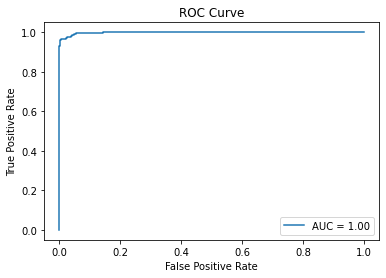

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = lstm_model.predict(X_test)
y_pred_proba = y_pred_proba[:, 0]  

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [99]:
def message(out):
    size = out
    toss = out[:15]
    mid = out[15:-15]
    hit = out[-15:]
    hit_am = np.count_nonzero(hit == 1)
    toss_am = np.count_nonzero(toss == 1)
    mid_am = np.count_nonzero(mid == 1)
    
    #print("---------------------",hit_am,toss_am,mid_am)
    flag_hit = 0
    flag_mid = 0
    flag_toss = 0
    
    
    if hit_am > np.round(len(hit)/5):
        flag_hit = 1    
    if toss_am > np.round(len(toss)/5):  
        flag_toss = 1
    if mid_am > np.round(len(mid)/5):
        flag_mid = 1
    
    return flag_hit,flag_toss,flag_mid


hit,toss,mid = message(y_predict)
#print(hit,toss,mid)

if hit and toss and mid == 0:
    print("All the three actions such as Tossing the ball and getting prepared for hitting the ball and Hitting the ball is Amatuer!!!")
elif hit and mid == 0:
    print("The actions such as hitting the ball and getting prepared for hitting the ball is Amatuer but tossing the ball is more like a Professional !!!")
elif hit and toss == 0:
    print("The actions such as Tossing the ball and Hitting the ball is Amatuer but getting prepared for hitting the ball is more like a professional")
elif toss and mid == 0:
    print("The actions such as Tossing the ball and getting prepared for hitting the ball is Amatuer but Hitting the ball is more like a Professional !!!")

elif hit == 0:
    print("You are a good player but please improve your hit to be a professional player")
elif toss == 0:
    print("You are a good player but please improve your ball toss to be a professional player")
elif mid == 0:
    print("You are a good player but please improve your preperation to hit the ball to be a professional player")
    
    
else:
    print("You are a professional!!!!")


The actions such as hitting the ball and getting prepared for hitting the ball is Amatuer but tossing the ball is more like a Professional !!!


In [97]:
size = 56

np.round(56/3)

19.0

In [43]:
from keras.models import load_model
import sklearn

In [72]:
y_predict = np.round(y_pred)

In [76]:
y_test

10835         Amatuer
9373          Amatuer
9228          Amatuer
9159          Amatuer
3758     Professional
             ...     
5344     Professional
3076     Professional
508      Professional
2224     Professional
4969     Professional
Name: Class, Length: 3330, dtype: object

In [77]:
accuracy_score(y_t,y_predict)

0.9882882882882883

In [60]:
y_pred = model.predict(X_test)

In [63]:
y_pred.mean()

0.7914564

In [84]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.38392534852027893, 0.2032294124364853, 0.15533117949962616, 0.13864034414291382, 0.12821413576602936, 0.11253467947244644, 0.10276062786579132, 0.0986751914024353, 0.0848362147808075, 0.08060307800769806, 0.07734844833612442, 0.07308509945869446, 0.07084664702415466, 0.058937814086675644, 0.05536587908864021, 0.05907799303531647, 0.05101386830210686, 0.0462377667427063, 0.045396242290735245, 0.04094814136624336]
[0.8545688390731812, 0.9115830063819885, 0.9364221096038818, 0.937966525554657, 0.9468468427658081, 0.9523809552192688, 0.9548262357711792, 0.9580437541007996, 0.9647361636161804, 0.9674388766288757, 0.9666666388511658, 0.9685971736907959, 0.9697554707527161, 0.977091372013092, 0.9782496690750122, 0.9752895832061768, 0.9803088903427124, 0.9819819927215576, 0.9812097549438477, 0.9835264086723328]
[0.2932441830635071, 0.17020009458065033, 0.13703708350658417, 0.1328325718641281, 0.1084190309047699, 0.14677466452121735, 0.08772531896829605, 0.08300451934337616, 0.07126156240701

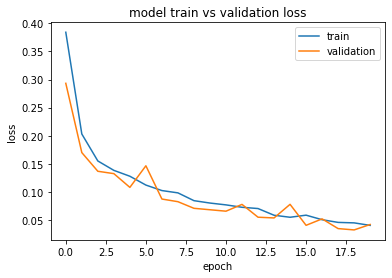

In [85]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [66]:
y_test
encoder = LabelEncoder()
encoder.fit(y_test)
y_t = encoder.transform(y_test)

In [ ]:
test.columns[-8:-2]

In [ ]:
x_pred = test[test.columns[-8:-2]]
y_totest = test[test.columns[-2]]

In [86]:
accuracy_score(y_t,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
df = pd.read_excel(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\Kev_test.xlsx")
data = df.values

In [ ]:
X_test = dataset[:,1:51].astype(float)
model.predict(X_test).mean()

Scott ------> 0.035862993
lak --------> 0.60514396
kev --------> 0.8071767
ewan --------> 0.80447155

In [ ]:
#fet = ['NOSE_X','NOSE_Y','NOSE_Z','LEFT_SHOULDER_X','LEFT_SHOULDER_Y','RIGHT_SHOULDER_X','RIGHT_SHOULDER_Z','LEFT_ELBOW_Y','LEFT_ELBOW_Z','RIGHT_ELBOW_X','RIGHT_ELBOW_Z','LEFT_WRIST_Y','LEFT_WRIST_Z','RIGHT_WRIST_X','RIGHT_WRIST_Y','RIGHT_HIP_X','LEFT_KNEE_Z','RIGHT_KNEE_X','RIGHT_ANKLE_Z','LEFT_HEEL_Y','RIGHT_HEEL_X','RIGHT_HEEL_Y','LEFT_FOOT_INDEX_X','LEFT_FOOT_INDEX_Z','Nose-Wrist Angle','Sho-Wrist Angle','Class_1','Class_2','Out']
fet = ['NOSE_X', 'NOSE_Y', 'NOSE_Z', 'LEFT_SHOULDER_X',
       'LEFT_SHOULDER_Y', 'LEFT_SHOULDER_Z', 'RIGHT_SHOULDER_X',
       'RIGHT_SHOULDER_Y', 'RIGHT_SHOULDER_Z', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y',
       'LEFT_ELBOW_Z', 'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'RIGHT_ELBOW_Z',
       'LEFT_WRIST_X', 'LEFT_WRIST_Y', 'LEFT_WRIST_Z', 'RIGHT_WRIST_X',
       'RIGHT_WRIST_Y', 'RIGHT_WRIST_Z', 'LEFT_HIP_X', 'LEFT_HIP_Y',
       'LEFT_HIP_Z', 'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'RIGHT_HIP_Z',
       'LEFT_KNEE_X', 'LEFT_KNEE_Y', 'LEFT_KNEE_Z', 'RIGHT_KNEE_X',
       'RIGHT_KNEE_Y', 'RIGHT_KNEE_Z', 'LEFT_ANKLE_X', 'LEFT_ANKLE_Y',
       'LEFT_ANKLE_Z', 'RIGHT_ANKLE_X', 'RIGHT_ANKLE_Y', 'RIGHT_ANKLE_Z',
       'LEFT_HEEL_X', 'LEFT_HEEL_Y', 'LEFT_HEEL_Z', 'RIGHT_HEEL_X',
       'RIGHT_HEEL_Y', 'RIGHT_HEEL_Z', 'LEFT_FOOT_INDEX_X',
       'LEFT_FOOT_INDEX_Y', 'LEFT_FOOT_INDEX_Z', 'RIGHT_FOOT_INDEX_X',
       'RIGHT_FOOT_INDEX_Y', 'RIGHT_FOOT_INDEX_Z',"Class"]

#to_test  = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Lak6.csv")

In [ ]:
dataframe = dataframe[fet][:8921]
test = dataframe[fet[:-1]][8921:]

In [ ]:
dataset = dataframe.values

In [ ]:
dataset[:79,0:51]

In [ ]:
X_train = dataset[79:,0:51].astype(float)
X_test = dataset[1:79,0:51].astype(float)
Y = dataset[79:,53]


In [ ]:
X_train

In [ ]:
cols = dataframe.columns

In [ ]:
cols

In [ ]:
features = len(cols)

In [ ]:
features

In [ ]:
X = dataframe[fet[:-1]]
X = np.resize(X,(X.shape[0],1,X.shape[1]))  
y = dataframe[fet[-1]]


In [ ]:
model.fit(X,y,batch_size= len(X),epochs =15)

In [ ]:
model.save(r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\LSTM\\')

In [ ]:
model.save_weights(r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\LSTM\model.h5')

In [ ]:
X_test_reshaped = np.resize(test, (test.shape[0], test.shape[1], 1))

# Make predictions using the reshaped data
output = model.predict(X_test_reshaped)

In [ ]:
output[0]

*KERAS MODEL*

def create_model():
    model = Sequential()
    model.add(Dense(100, input_shape=(51,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


checkpoint_path = r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Keras model\\"
checkpoint_dir = os.path.dirname(checkpoint_path)

#Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

estimator = KerasClassifier(model=create_model, epochs=20, batch_size=5,callbacks=[cp_callback], verbose=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


In [6]:
# Binary Classification with Sonar Dataset: Baseline
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib as plt
from keras.callbacks import LearningRateScheduler
import numpy as np


from tensorflow.keras.models import save_model
import tensorflow as tf


#dataframe = read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\Neural Net In.csv")


In [ ]:
dataframe = dataframe.drop('Unnamed: 0',1)

In [ ]:
dataset = dataframe.values

In [ ]:

X = dataset[1:,1:51].astype(float)
Y = dataset[1:,52]

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)


In [ ]:
X_train,X_test,Y_train,Y_test = X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
import tensorflow as tf
print(tf.__version__)
pip install tensorflow==2.7.0 --user


def adjust_learning_rate(epoch, lr):
    return lr * 0.1 if epoch % 5 == 0 else lr  # Reduce LR every 5 epochs

lr_scheduler = LearningRateScheduler(adjust_learning_rate)

In [ ]:
pip uninstall scikeras

In [ ]:
pip install scikeras==0.3.0

X_train = dataset[1:,0:51].astype(float)
#X_test = dataset[8921:,0:51].astype(float)
Y = dataset[1:8921,53]
y_test = dataset[8921:,53]
#encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)


#estimator = KerasClassifier(model=create_model, epochs=20, batch_size=5,validation_split=0.3,callbacks=[cp_callback], verbose=1,random_state=None)

In [ ]:
checkpoint_path = r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Neural Net 2\\"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

In [5]:
from keras.layers import Dense, BatchNormalization, Dropout

In [17]:
dataframe[dataframe.columns[-2]]

0        Amatuer
1        Amatuer
2        Amatuer
3        Amatuer
4        Amatuer
          ...   
11095    Amatuer
11096    Amatuer
11097    Amatuer
11098    Amatuer
11099    Amatuer
Name: Class, Length: 11100, dtype: object

In [18]:
X = dataframe[dataframe.columns[-8:-2]]

In [23]:
Y = dataframe[dataframe.columns[-2]]
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [20]:
from tensorflow.keras.optimizers import Adam


result = []
optimizer = Adam(learning_rate=0.01)
model = Sequential()
model.add(Dense(100, input_shape=(6,), activation='relu'))

model.add(Dense(50, input_shape=(6,), activation='sigmoid'))

model.add(Dropout(0.1))
        
model.add(Dense(1, activation='sigmoid'))
        
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 
history= model.fit(X_train,Y_train, batch_size=5, epochs=20,validation_data=(X_test,y_test))



Epoch 1/20
1511/1511 [==============================] - 5s 3ms/step - loss: -7417.5796 - accuracy: 0.0077 - val_loss: -14836.5293 - val_accuracy: 0.0080
Epoch 2/20
1511/1511 [==============================] - 4s 3ms/step - loss: -22101.7480 - accuracy: 0.0077 - val_loss: -29378.7461 - val_accuracy: 0.0080
Epoch 3/20
1511/1511 [==============================] - 4s 3ms/step - loss: -36644.1289 - accuracy: 0.0077 - val_loss: -43965.0234 - val_accuracy: 0.0080
Epoch 4/20
1511/1511 [==============================] - 4s 3ms/step - loss: -51114.1602 - accuracy: 0.0077 - val_loss: -58486.3867 - val_accuracy: 0.0080
Epoch 5/20
1511/1511 [==============================] - 4s 3ms/step - loss: -65801.2266 - accuracy: 0.0077 - val_loss: -73044.4375 - val_accuracy: 0.0080
Epoch 6/20
1511/1511 [==============================] - 4s 3ms/step - loss: -80210.3828 - accuracy: 0.0077 - val_loss: -87556.4375 - val_accuracy: 0.0080
Epoch 7/20
1511/1511 [==============================] - 4s 3ms/step - loss: -

In [ ]:
estimator = KerasClassifier(model=create_model, epochs=20, batch_size=5,validation_split=0.3, verbose=1, shuffle=True, random_state=None)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
result.append((results.mean()*100, results.std()*100))
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [30]:
keras_model = estimator.fit(X_train,y_train)

Epoch 1/20
1088/1088 [==============================] - 4s 3ms/step - loss: 0.3973 - accuracy: 0.8673 - val_loss: 0.3848 - val_accuracy: 0.8739
Epoch 2/20
1088/1088 [==============================] - 3s 3ms/step - loss: 0.3716 - accuracy: 0.8726 - val_loss: 0.3563 - val_accuracy: 0.8795
Epoch 3/20
1088/1088 [==============================] - 3s 3ms/step - loss: 0.3670 - accuracy: 0.8733 - val_loss: 0.3502 - val_accuracy: 0.8777
Epoch 4/20
1088/1088 [==============================] - 3s 3ms/step - loss: 0.3664 - accuracy: 0.8731 - val_loss: 0.3507 - val_accuracy: 0.8790
Epoch 5/20
1088/1088 [==============================] - 3s 3ms/step - loss: 0.3689 - accuracy: 0.8726 - val_loss: 0.3603 - val_accuracy: 0.8752
Epoch 6/20
1088/1088 [==============================] - 3s 3ms/step - loss: 0.3648 - accuracy: 0.8724 - val_loss: 0.3480 - val_accuracy: 0.8820
Epoch 7/20
1088/1088 [==============================] - 3s 3ms/step - loss: 0.3641 - accuracy: 0.8744 - val_loss: 0.3414 - val_accuracy:

In [31]:
y_pred = estimator.predict(X_test)

666/666 [==============================] - 1s 1ms/step


In [32]:
encoder = LabelEncoder()
encoder.fit(y_test)
y_test = encoder.transform(y_test)
accuracy_score(y_test,y_pred)

0.8903903903903904

In [33]:
confusion_matrix(y_test,y_pred)

array([[ 291,  360],
       [   5, 2674]], dtype=int64)

In [34]:
sklearn.metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.45      0.61       651\n           1       0.88      1.00      0.94      2679\n\n    accuracy                           0.89      3330\n   macro avg       0.93      0.72      0.78      3330\nweighted avg       0.90      0.89      0.87      3330\n'

In [53]:
from sklearn.metrics import plot_roc_curve
import sklearn

666/666 [==============================] - 1s 1ms/step


AttributeError: module 'matplotlib' has no attribute 'show'

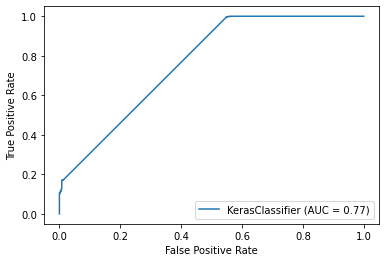

In [36]:
plot_roc_curve(estimator, X_test, y_test)
plt.show()

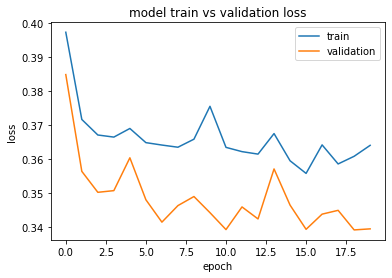

In [37]:
from matplotlib import pyplot

pyplot.plot(keras_model.history_['loss'])
pyplot.plot(keras_model.history_['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [49]:
estimator.model_.save(r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Keras\Keras_17_8.keras')

In [39]:

filename = r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Keras\Keras_17_08.sav'
pickle.dump(keras_model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpkqnrtib8\assets


In [43]:
keras_model.save(r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Keras\Keras_17_8.keras')  # The file needs to end with the .keras extension


AttributeError: 'function' object has no attribute 'save'

In [53]:
ker_model = keras.models.load_model(r'C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Models\Keras\Keras_17_8.keras')

In [52]:
import keras

In [40]:
pickleFile = pickle.load(open(filename, "rb"))

AttributeError: 'Adam' object has no attribute 'build'

In [52]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define your binary classification data (X_train, Y_train) and other parameters

# Define the create_model function for Keras
def create_model(layers=1, neurons=50, dropout_rate=0.0):
    model = Sequential()
    for _ in range(layers):
        model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation='tanh'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model,epochs=5,verbose=0)

# Define the parameter grid for grid search
param_grid = {
    'layers': [1, 2],  
    'batch_size': [4,5,10,20],
    'neurons': [20,50,60,100],     # Number of neurons per layer
    'dropout_rate': [0.1,0.2,0.3],  # Dropout rate
    
}

# Define a custom scoring function (ROC AUC in this case)
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Perform grid search using cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=roc_auc_scorer, cv=kfold, verbose=1)
grid_result = grid.fit(X_train, y_train)

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-52-f48db531799b>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model,epochs=5,verbose=0)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 215.8min finished


Best: 0.929021 using {'batch_size': 4, 'dropout_rate': 0.1, 'layers': 2, 'neurons': 100}
0.757408 (0.017444) with: {'batch_size': 4, 'dropout_rate': 0.1, 'layers': 1, 'neurons': 20}
0.803296 (0.036306) with: {'batch_size': 4, 'dropout_rate': 0.1, 'layers': 1, 'neurons': 50}
0.802014 (0.044463) with: {'batch_size': 4, 'dropout_rate': 0.1, 'layers': 1, 'neurons': 60}
0.819814 (0.020947) with: {'batch_size': 4, 'dropout_rate': 0.1, 'layers': 1, 'neurons': 100}
0.868581 (0.027258) with: {'batch_size': 4, 'dropout_rate': 0.1, 'layers': 2, 'neurons': 20}
0.905734 (0.013906) with: {'batch_size': 4, 'dropout_rate': 0.1, 'layers': 2, 'neurons': 50}
0.899081 (0.042916) with: {'batch_size': 4, 'dropout_rate': 0.1, 'layers': 2, 'neurons': 60}
0.929021 (0.022395) with: {'batch_size': 4, 'dropout_rate': 0.1, 'layers': 2, 'neurons': 100}
0.714700 (0.021454) with: {'batch_size': 4, 'dropout_rate': 0.2, 'layers': 1, 'neurons': 20}
0.773617 (0.030272) with: {'batch_size': 4, 'dropout_rate': 0.2, 'layers

In [ ]:
estimator.fit(X_train,Y)

*Evaluating Model by confusion matrix*

In [ ]:
y_pred.shape

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
cm[0]

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)


In [ ]:
from sklearn import metrics


conf = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
m_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [False, True])

In [ ]:
F1_score = metrics.f1_score(y_test, y_pred)

In [ ]:
F1_score

In [ ]:
from sklearn.metrics import confusion_matrix

y_prediction= estimator.predict(X_test)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')

In [ ]:
X_test = dataset[1:79, :51]
y_test = dataset[1:79,53]

In [ ]:
pip install pytest

In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools

seed = 7
numpy.random.seed(seed)

dataframe = pandas.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Academics\Summer Semester\Dissertation\Model_out\LSTM_data.csv")

dataset = dataframe.values
X = dataset[79:,0:51].astype(float) # number of cols-1
Y = dataset[79:,53]

#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)

#encoded_Y = np_utils.to_categorical(encoded_Y)
#print("encoded_Y=", encoded_Y) 
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))

    model.add(Dense(2, kernel_initializer='normal', activation='softmax'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # for binayr classification
        #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # for multi class
    return model


model=create_baseline();
history=model.fit(X, Y, batch_size=5, epoch=50, validation_split = 0.2, verbose=1)
print(history.history.keys())
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


pre_cls=model.predict_classes(X)    
cm1 = confusion_matrix(encoder.transform(Y),pre_cls)
print('Confusion Matrix : \n')
print(cm1)


score, acc = model.evaluate(X,encoded_Y)
print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
from sklearn.metrics import roc_curve


In [ ]:
y_pred_proba = model.predict_proba(new_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()